In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# ------------------- 데이터 로딩 -------------------

# 자동차 평가 데이터 불러오기 (Data 폴더에서)
df = pd.read_csv("./Data/car_evaluation.csv", header=None, 
                 names=['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety', 'output'])

print(df.head())


   price  maint doors persons lug_capacity safety output
0  vhigh  vhigh     2       2        small    low  unacc
1  vhigh  vhigh     2       2        small    med  unacc
2  vhigh  vhigh     2       2        small   high  unacc
3  vhigh  vhigh     2       2          med    low  unacc
4  vhigh  vhigh     2       2          med    med  unacc


In [3]:
# ------------------- 데이터 전처리 -------------------

# 결측치 확인
print("\nMissing values per column:\n", df.isnull().sum())

# 모든 문자열 데이터를 숫자로 변환 (Label Encoding)
encoder = LabelEncoder()
for column in df.columns:
    df[column] = encoder.fit_transform(df[column])

print("\nEncoded DataFrame:\n", df.head())


Missing values per column:
 price           0
maint           0
doors           0
persons         0
lug_capacity    0
safety          0
output          0
dtype: int64

Encoded DataFrame:
    price  maint  doors  persons  lug_capacity  safety  output
0      3      3      0        0             2       1       2
1      3      3      0        0             2       2       2
2      3      3      0        0             2       0       2
3      3      3      0        0             1       1       2
4      3      3      0        0             1       2       2


In [5]:
# ------------------- Feature / Target 분리 -------------------

X = df.drop('output', axis=1).values  # 입력 변수
y = df['output'].values               # 타겟 변수

# 타겟을 원-핫 인코딩
y_cat = to_categorical(y, num_classes=4)

print("\nFeature shape:", X.shape)
print("Label shape (one-hot):", y_cat.shape)


Feature shape: (1728, 6)
Label shape (one-hot): (1728, 4)


In [7]:
# ------------------- 데이터 분할 -------------------

X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=0)

print("\nTrain/Test size:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)


Train/Test size:
X_train: (1382, 6) X_test: (346, 6)
y_train: (1382, 4) y_test: (346, 4)


In [9]:
# ------------------- 딥러닝 모델 구축 -------------------

model = Sequential([
    Input(shape=(6,)),
    Dense(100, activation='relu', name='Hidden_1'),
    Dense(50, activation='relu', name='Hidden_2'),
    Dense(20, activation='relu', name='Hidden_3'),
    Dense(4, activation='softmax', name='Output')
])

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.002),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_1 (Dense)                │ (None, 100)            │           700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_2 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_3 (Dense)                │ (None, 20)             │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 4)              │            84 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,854 (26.77 KB)

 Trainable params: 6,854 (26.77 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5096 - loss: 1.2325 - val_accuracy: 0.6908 - val_loss: 0.7887
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7062 - loss: 0.7554 - val_accuracy: 0.6792 - val_loss: 0.7155
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7115 - loss: 0.6831 - val_accuracy: 0.6908 - val_loss: 0.6561
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7355 - loss: 0.6000 - val_accuracy: 0.7023 - val_loss: 0.6153
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7559 - loss: 0.5369 - val_accuracy: 0.7370 - val_loss: 0.5444
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7818 - loss: 0.4782 - val_accuracy: 0.7861 - val_loss: 0.4713
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8219 - loss: 0.4005 - val_accuracy: 0.8382 - val_loss: 0.3661
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8865 - loss: 0.2936 - val_accuracy: 0.8555 - val_loss:

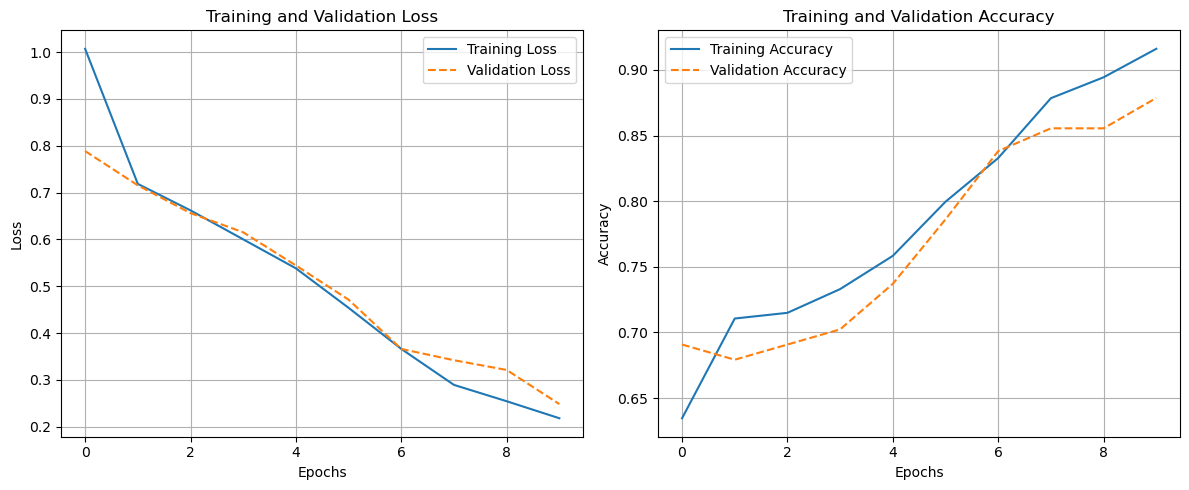

In [11]:
# ------------------- 모델 학습 -------------------

EPOCHS = 10
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=32, validation_data=(X_test, y_test))

# ------------------- 결과 시각화 -------------------

# Loss 시각화
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Accuracy 시각화
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='--')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [13]:
# ------------------- 모델 평가 -------------------

# 예측 결과
y_pred = model.predict(X_test)
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

# 평가 지표 출력
print("\nClassification Report:\n")
print(classification_report(y_test_labels, y_pred_labels))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test_labels, y_pred_labels))


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.66      0.71        79
           1       0.87      0.76      0.81        17
           2       0.91      0.97      0.94       240
           3       0.86      0.60      0.71        10

    accuracy                           0.88       346
   macro avg       0.85      0.75      0.79       346
weighted avg       0.87      0.88      0.87       346


Confusion Matrix:

[[ 52   2  24   1]
 [  4  13   0   0]
 [  7   0 233   0]
 [  4   0   0   6]]
